# IT market analysis 3

In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import random
import numpy as np

## Liczba plików dla wybranych języków

In [443]:
query1 = """SELECT
COUNT(case WHEN path LIKE '%.py' THEN 1 ELSE NULL END) AS Python,
COUNT(case WHEN path LIKE '%.js' THEN 1 ELSE NULL END) AS JavaScript,
COUNT(case WHEN path LIKE '%.r' THEN 1 ELSE NULL END) AS R,
COUNT(case WHEN path LIKE '%.java' THEN 1 ELSE NULL END) AS Java,
COUNT(case WHEN path LIKE '%.go' THEN 1 ELSE NULL END) AS Go,
COUNT(case WHEN path LIKE '%.cs' THEN 1 ELSE NULL END) AS CS,
COUNT(case WHEN path LIKE '%.rb' THEN 1 ELSE NULL END) AS RUBY,
COUNT(case WHEN path LIKE '%.swift' THEN 1 ELSE NULL END) AS SWIFT
FROM `bigquery-public-data.github_repos.sample_files`
"""

In [444]:
df1 = pd.read_gbq(query = query1, project_id = 'it-market-analysis', dialect = 'standard')

In [445]:
df1 = df1.transpose().sort_values(by = 0, ascending = False)

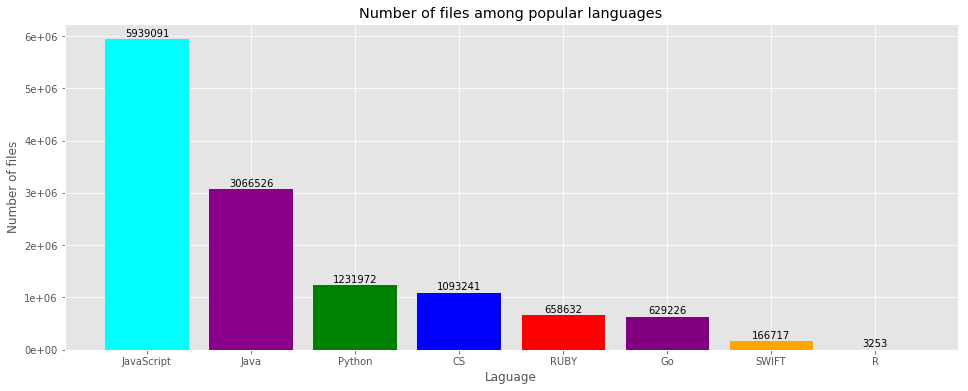

In [446]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = "16, 6"
x = list(df1.index.values)
values = list(df1[0])

x_pos = [i for i, _ in enumerate(x)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.0e'))

plt.bar(x_pos, values, color=["cyan", "darkmagenta","green", "blue","red", "purple", "orange", "grey"], label =x )
plt.xlabel("Laguage")
plt.ylabel("Number of files")
plt.title("Number of files among popular languages")
for i in range(len(x)):
    plt.text(x_pos[i], values[i] + values[0]/100 , values[i], horizontalalignment='center')
plt.xticks(x_pos, x)
plt.show()

Trzeba pamiętać, że deweloperzy niektórych języków (na przykład Python) mają tendencję do pisania wikększości kodu w jednym pliku. Tymczasem praca z językami takimi jak Java, czy C# zakłada, że każda klasa jest w osobnym pliku. Dlatego też nie powinniśmy sugerować się tylko powyższym wykresem przy analizowaniu popularności. Jednak przy zestawieniu z wykresami jakie otrzymaliśmy w poprzednich zadaniach możemy potwierdzić przekonanie o tym, że tworzenie mniejszej ilości plików wśród deweloperów Pythona jest popularne.

## Popularność repozytoriów z dużą liczbą plików w pythonie

In [447]:
query2 ="""
        SELECT `bigquery-public-data.github_repos.sample_repos`.repo_name AS RepoName, 
        `bigquery-public-data.github_repos.sample_repos`.watch_count AS Popularity,
        COUNT(`bigquery-public-data.github_repos.sample_files`.path) AS PythonFiles
        FROM `bigquery-public-data.github_repos.sample_repos`
        INNER JOIN `bigquery-public-data.github_repos.sample_files`
        ON `bigquery-public-data.github_repos.sample_files`.repo_name =
        `bigquery-public-data.github_repos.sample_repos`.repo_name
        WHERE path LIKE '%.py' 
        GROUP BY RepoName, watch_count
        HAVING PythonFiles > 100
        ORDER BY watch_count DESC 
        LIMIT 20
        """

In [448]:
df2 = pd.read_gbq(query = query2, project_id = 'it-market-analysis', dialect = 'standard')

In [449]:
df2

,RepoName,Popularity,PythonFiles
0,tensorflow/tensorflow,10728,786
1,apple/swift,7041,104
2,rg3/youtube-dl,5140,696
3,soimort/you-get,4776,123
4,nvbn/thefuck,4438,230
5,letsencrypt/letsencrypt,4325,187
6,XX-net/XX-Net,4010,1119
7,HelloZeroNet/ZeroNet,3492,237
8,ansible/ansible,3038,442
9,scikit-learn/scikit-learn,3023,664


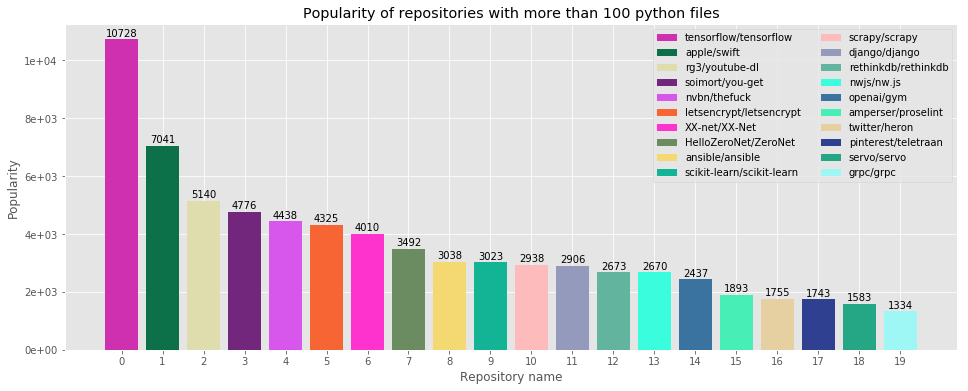

In [450]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = "16, 6"
x = list(df2.index.values)
values = list(df2["Popularity"])
x_pos = [i for i, _ in enumerate(x)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.0e'))

for i in range(len(x)):
    plt.bar(x_pos[i], values[i], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)), label =df2["RepoName"][i] )
plt.xlabel("Repository name")
plt.ylabel("Popularity")
plt.title("Popularity of repositories with more than 100 python files")
for i in range(len(x)):
    plt.text(x_pos[i], values[i] + values[0]/100 , values[i], horizontalalignment='center')
plt.xticks(x_pos, x)
plt.legend(loc='upper right', ncol = 2)
plt.show()

Z powyższego wykresu możemy odczytać jakie biblioteki i frameworki cieszą się dużą popularnością wśród deweloperów Pythona. Pierwsze miejsce zajmuje popularna biblioteka do machine lerningu - Tenserflow, a jedenaste najpopularniejsza biblioteka służąca do web scrappigu - Scrapy. Na dwunastym miejscu uplasował się framework do tworzenia aplikacji internetowych - Django.

## Najpopularniejsze języki wśród najpopularniejszych repozytoriów

In [451]:
query3 = """
SELECT
`bigquery-public-data.github_repos.languages`.repo_name AS RepoName,
`bigquery-public-data.github_repos.languages`.language AS LanguageList,
`bigquery-public-data.github_repos.sample_repos`.watch_count AS Popularity
FROM `bigquery-public-data.github_repos.languages`
INNER JOIN `bigquery-public-data.github_repos.sample_repos`
ON `bigquery-public-data.github_repos.languages`.repo_name = 
`bigquery-public-data.github_repos.sample_repos`.repo_name 
ORDER BY Popularity DESC
LIMIT 30
"""

In [452]:
df3 = pd.read_gbq(query = query3, project_id = 'it-market-analysis', dialect = 'standard')

In [453]:
df3 = df3[[bool(x) for x in df3["LanguageList"]]]

In [454]:
languageList = []
for i in df3["LanguageList"]:
    varList = []
    for j in i:
        varList.append(j['bytes'])
    languageList.append(varList.index(max(varList)))
counter = 0
mostPopular = []
while counter < len(languageList):
    mostPopular.append(list(df3["LanguageList"])[counter][languageList[counter]]['name'])
    counter += 1
df3["MostPopular"] = mostPopular

In [455]:
df3

,RepoName,LanguageList,Popularity,MostPopular
0,FreeCodeCamp/FreeCodeCamp,"[{'name': 'CSS', 'bytes': 190263}, {'name': 'H...",90457,JavaScript
2,tensorflow/tensorflow,"[{'name': 'Assembly', 'bytes': 3557}, {'name':...",10728,C++
3,facebook/react,"[{'name': 'C', 'bytes': 5225}, {'name': 'C++',...",10458,JavaScript
5,vuejs/vue,"[{'name': 'CSS', 'bytes': 11301}, {'name': 'HT...",8822,JavaScript
6,airbnb/javascript,"[{'name': 'JavaScript', 'bytes': 65557}]",8708,JavaScript
8,twbs/bootstrap,"[{'name': 'CSS', 'bytes': 417182}, {'name': 'H...",8211,JavaScript
9,getlantern/lantern,"[{'name': 'Assembly', 'bytes': 102873}, {'name...",8110,Go
10,airbnb/caravel,"[{'name': 'CSS', 'bytes': 57416}, {'name': 'HT...",7764,Python
12,jgthms/bulma,"[{'name': 'CSS', 'bytes': 327895}, {'name': 'S...",7387,CSS
13,dthree/cash,"[{'name': 'JavaScript', 'bytes': 218354}]",7309,JavaScript


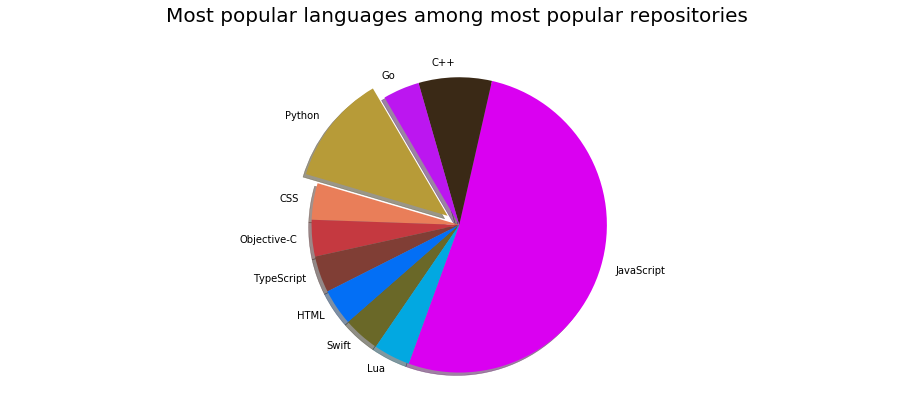

In [456]:
labels = df3["MostPopular"].unique()
values = [list(df3["MostPopular"]).count(x) for x in labels]
colors = [(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)) for i in range(len(values))]
explode = (0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.rcParams["figure.figsize"] = "16, 6"
plt.pie(values, explode=explode, labels=labels, colors=colors,
 shadow=True, startangle=250)
plt.title("Most popular languages among most popular repositories", pad = 40, fontsize = 20)
plt.axis('equal')
plt.show()

Najpopularniejszym językiem wśród repozytoriów o dużym zainteresowaniu jest JavaScript. Prawdopodobnie łączy się to z szybkim rozwojem, z którym aktualnie kojarzony jest ten język. Duża ilość nowych frameworków i bibliotek zmusza deweloperów tego języka do częstego odwiedzanie githuba w celu poznania nowych możliwości tego języka. Python zajął tutaj drugie miejsce co zawdzięcza między innymi repozytoruium z popularną biblioteką - Tensorflow oraz repozytorium z biblioteką do tworzenia złożonych obrazów z prostych kształtów. obie rzeczy są mocno związane z machine lerningiem co świadczy o tym, że jest to aktualnie najbardziej powszechna dziedzina dla Pythona.